In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
sep_coins = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/pennies.jpg')

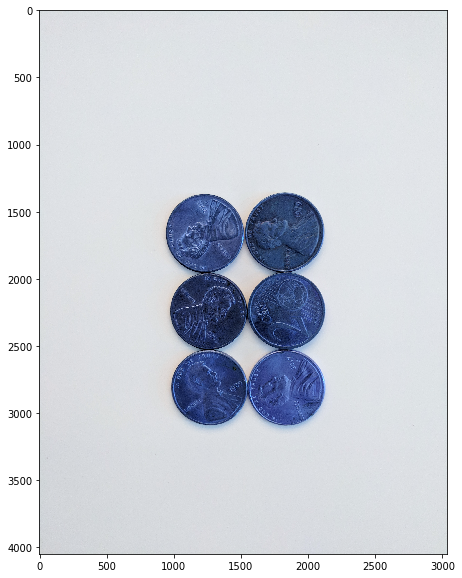

In [5]:
display(sep_coins)

In [6]:
sep_blur = cv2.medianBlur(sep_coins,25)

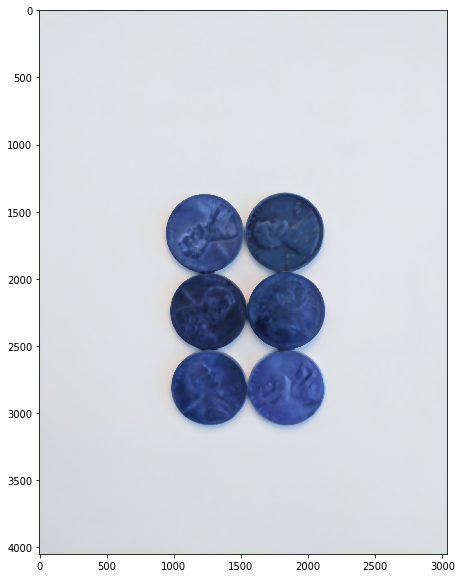

In [7]:
display(sep_blur)

In [9]:
gray_sep_coins =cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

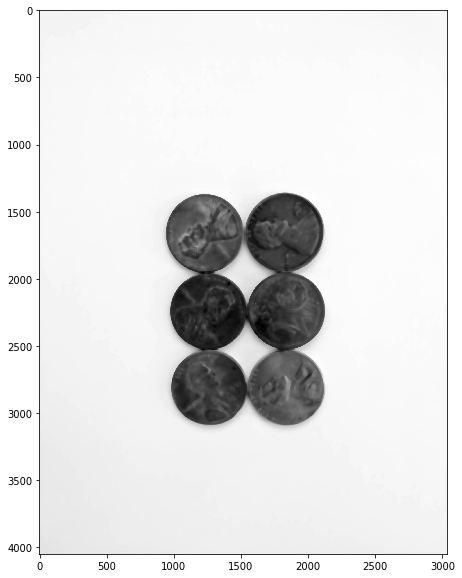

In [10]:
display(gray_sep_coins)

In [11]:
ret,sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

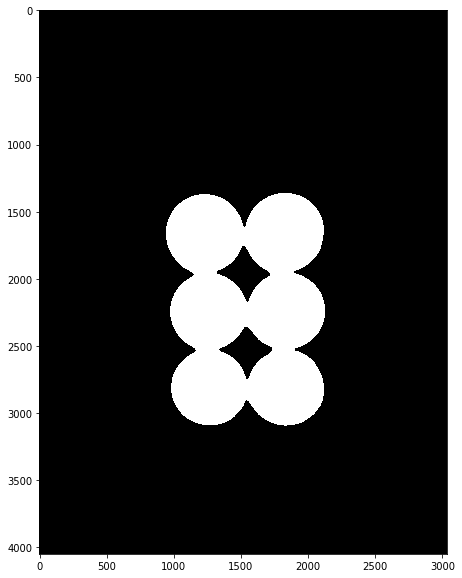

In [12]:
display(sep_thresh)

In [13]:
image,contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [15]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

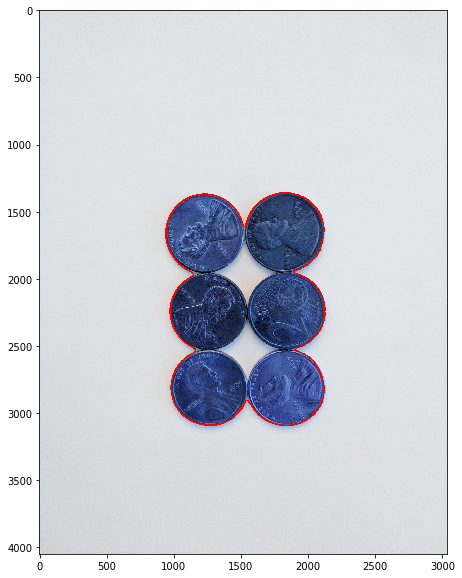

In [16]:
display(sep_coins)

In [20]:
img = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/pennies.jpg')

In [21]:
img = cv2.medianBlur(img,35)

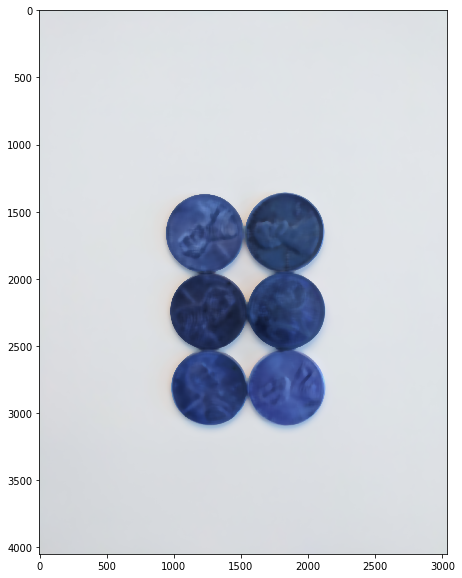

In [22]:
display(img)

In [23]:
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [26]:
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU)

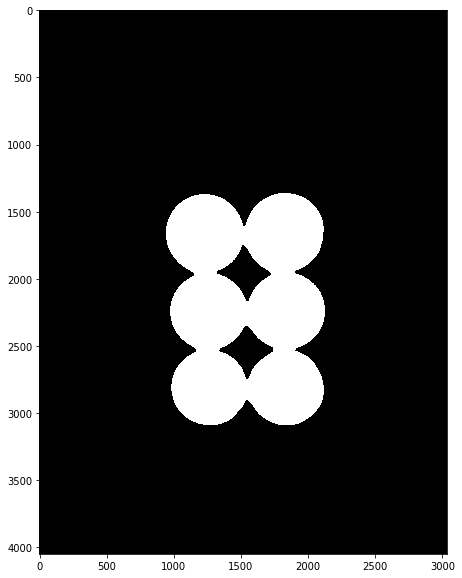

In [27]:
display(thresh)

In [28]:
kernel = np.ones((3,3),np.uint8)

In [29]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [30]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

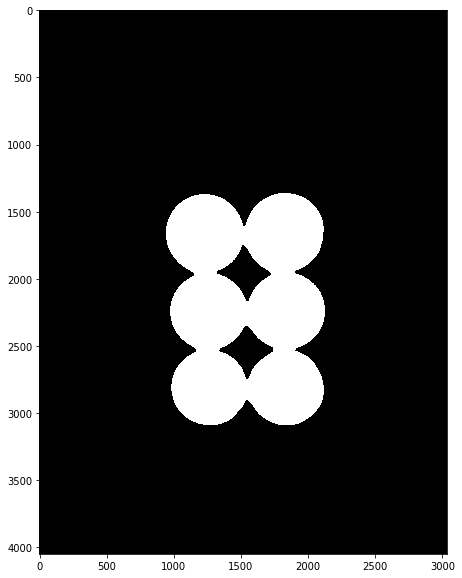

In [31]:
display(opening)

In [32]:
dist_transform =cv2.distanceTransform(opening,cv2.DIST_L2,5)

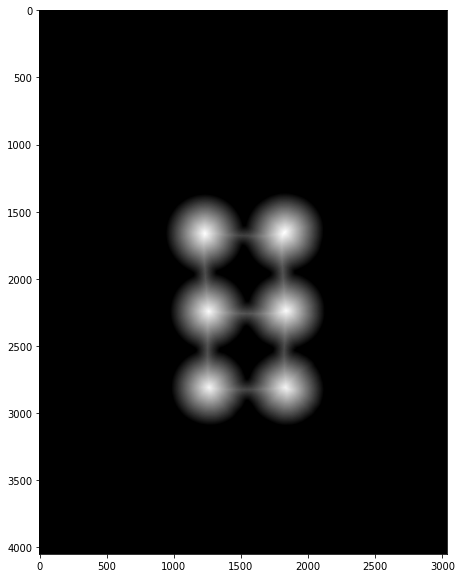

In [33]:
display(dist_transform)

In [34]:
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

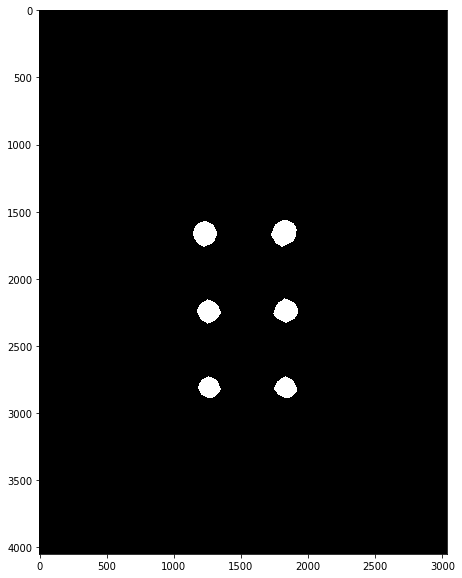

In [35]:
display(sure_fg)

In [36]:
sure_fg = np.uint8(sure_fg)

In [39]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

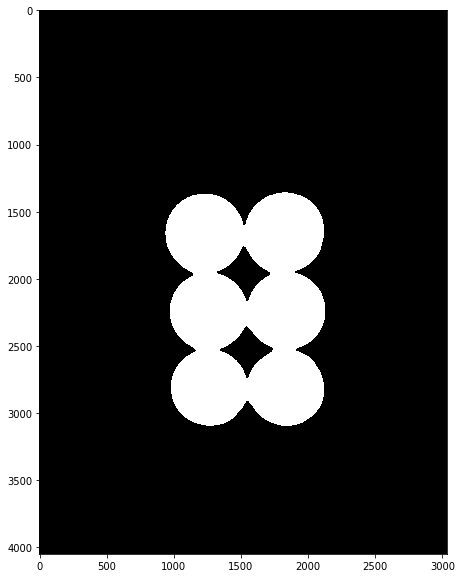

In [40]:
display(sure_bg)

In [41]:
unknown = cv2.subtract(sure_bg,sure_fg)

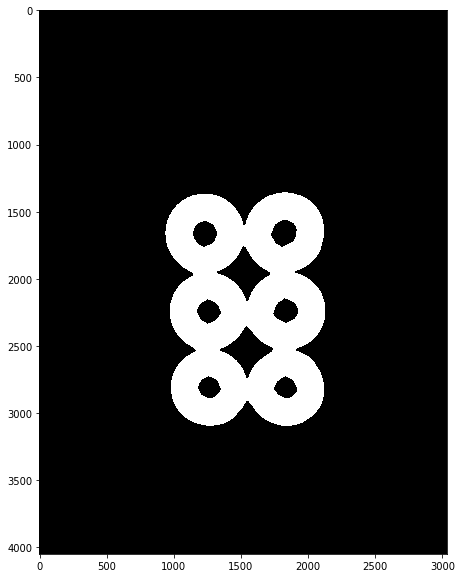

In [42]:
display(unknown)

In [45]:
ret,markers = cv2.connectedComponents(sure_fg)

In [47]:
markers = markers + 1

In [48]:
markers[unknown == 255] = 0

In [50]:
markers = cv2.watershed(img,markers)

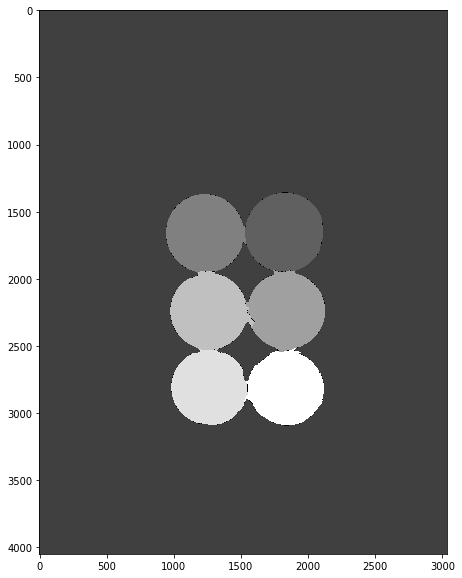

In [51]:
display(markers)

In [53]:
image,contours,hierarchy = cv2.findContours(markers,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [54]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

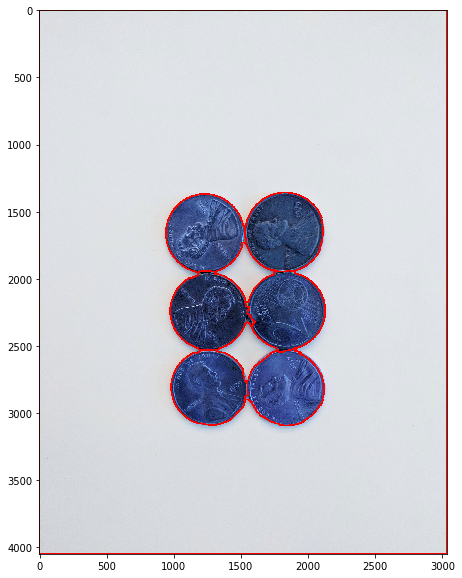

In [55]:
display(sep_coins)

In [3]:
road = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/road_image.jpg')

In [4]:
road_copy = road.copy()

In [59]:
# plt.imshow(road)

In [5]:
road.shape

(600, 800, 3)

In [6]:
marker_image = np.zeros(road.shape[:2],dtype=np.int32)

In [7]:
segments = np.zeros(road.shape,dtype=np.uint8)

In [8]:
segments.shape

(600, 800, 3)

In [9]:
from matplotlib import cm

In [10]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [11]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [12]:
colors =[]
for i in range(10):
    colors.append(create_rgb(i))

In [13]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [14]:
current_marker = 1
n_markers = 10    
marks_updated = False

In [15]:
def mouse_callback(event,x,y,flags,param):
    global marks_updated
    
    if event == cv2.EVENT_LBUTTONDOWN:
        
        cv2.circle(marker_image,(x,y),10,(current_marker),-1)
        
        cv2.circle(road_copy,(x,y),10,colors[current_marker],-1)
        
        marks_updated = True

In [16]:
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image',mouse_callback)

while True:
    
    cv2.imshow('Watershed segments',segments)
    cv2.imshow('Road Image',road_copy)
    
    k= cv2.waitKey(1)
    
    if k == 27:
        break
    
    elif k == ord('c'):
        road_copy =road.copy()
        marker_image = np.zeros(road.shape[:2],dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
    if k >0 and chr(k).isdigit():
        current_marker = int(chr(k))

    if marks_updated :
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road,marker_image_copy)
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy==(color_ind)] = colors[color_ind]
        
        
        
        
cv2.destroyAllWindows()